In [1]:
# !pip install flat_table

In [2]:
import requests
from bs4 import BeautifulSoup
import html5lib

from skimage import io
import matplotlib.pyplot as plt

import json
from pandas import json_normalize
import flat_table # to "unravel" json to df tables

import pandas as pd
import numpy as np
import re

In [3]:
f = open("../data/Fremont All Single Family.json")
data = json.load(f)

In [4]:
len(data)

365

In [5]:
data[:5]

[{'xpath': '/html[1]/body[1]/div[5]/div[3]/div[1]/section[1]/div[1]/div[1]/div[1]/section[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[7]/div[1]/img[1]',
  'naturalHeight': 479,
  'width': 640,
  'diffbotUri': 'image|3|-1396601714',
  'type': 'image',
  'url': 'https://p.rdcpix.com/v01/l74c6f341-m0xd-w1020_h770_q80.jpg',
  'naturalWidth': 640,
  'height': 479,
  'docId': 2693034133,
  'fromSeedUrl': 'https://www.realtor.com/realestateandhomes-search/Fremont_CA/type-single-family-home',
  'seedUrlHash32': 3224416564,
  'parentUrlDocId': 139816956057,
  'gburl': 'https://www.realtor.com/realestateandhomes-detail/34239-Maybird-Cir_Fremont_CA_94555_M19530-21488-diffbotxyz1814557087',
  'lastCrawlTimeUTC': 1602203843,
  'timestamp': 'Fri, 09 Oct 2020 00:37:23 GMT'},
 {'images': [{'xpath': '/html[1]/body[1]/div[5]/div[3]/div[1]/section[1]/div[1]/div[1]/div[1]/section[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/div[8]/div[1]/img[1]',
    'naturalHeight': 480,
    'width': 373,
    'diffb

In [6]:
#anyone know what the website he looked at is? 
#https://www.realtor.com/realestateandhomes-search/Fremont_CA/type-single-family-home

df = json_normalize(data)
df

,xpath,naturalHeight,width,diffbotUri,type,url,naturalWidth,height,docId,fromSeedUrl,...,specs.construction_materials,normalizedSpecs.condition,specs.house_size_1531_sq_ft,specs.year_built_1959,specs.lot_size_7832,specs.lot_size_4033,specs.house_size_2102_sq_ft,specs.year_renovated_1990,specs.heating_forced_air,specs.beds_4
0,/html[1]/body[1]/div[5]/div[3]/div[1]/section[...,479.0,640.0,image|3|-1396601714,image,https://p.rdcpix.com/v01/l74c6f341-m0xd-w1020_...,640.0,479.0,2693034133,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,product|3|-1625278154,product,NaN,NaN,NaN,8389357724,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/html[1]/body[1]/div[5]/div[3]/div[1]/section[...,256.0,256.0,image|3|1664461067,image,https://maps.googleapis.com/maps/vt?pb=!1m5!1m...,256.0,256.0,19011170444,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,product|3|433280518,product,NaN,NaN,NaN,37256130690,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,product|3|-1140163614,product,NaN,NaN,NaN,42466717885,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,product|3|-426336003,product,NaN,NaN,NaN,246481760435,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,/html[1]/head[1]/meta[12],427.0,0.0,image|3|617031299,image,https://ap.rdcpix.com/013cbe1a7d686c8243e44d83...,640.0,0.0,261701234840,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,product|3|1454902555,product,NaN,NaN,NaN,271866507444,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,product|3|-189981270,product,NaN,NaN,NaN,273173557433,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# NULLS
for i, col in enumerate(df.columns): 
    print(i, col, np.count_nonzero(pd.isna(df[col])))

0 xpath 142
1 naturalHeight 132
2 width 132
3 diffbotUri 0
4 type 0
5 url 132
6 naturalWidth 132
7 height 132
8 docId 0
9 fromSeedUrl 0
10 seedUrlHash32 0
11 parentUrlDocId 0
12 gburl 0
13 lastCrawlTimeUTC 0
14 timestamp 0
15 images 235
16 offerPrice 238
17 productId 238
18 multipleProducts 238
19 availability 238
20 title 223
21 humanLanguage 233
22 pageUrl 233
23 text 238
24 category 238
25 sku 238
26 offerPriceDetails.symbol 239
27 offerPriceDetails.amount 238
28 offerPriceDetails.text 238
29 specs.property_type_single_family 361
30 specs.lot_size_4789 364
31 specs.year_built_1990 364
32 specs.house_size_2110_sq_ft 364
33 specs.beds_3 360
34 specs.year_renovated_1966 364
35 specs.house_size_1108_sq_ft 364
36 specs.date_updated_08282020 363
37 specs.construction_wood_frame 363
38 specs.lot_size_5800 364
39 specs.foundation_details 341
40 specs.total_square_feet_living 319
41 specs.roof 327
42 specs.structure_type 322
43 specs.property_age 331
44 specs.year_built 311
45 specs.levels_o

In [8]:
df[df['description'].notnull()] #check what the nonnulls look like (e.g. description)

,xpath,naturalHeight,width,diffbotUri,type,url,naturalWidth,height,docId,fromSeedUrl,...,specs.construction_materials,normalizedSpecs.condition,specs.house_size_1531_sq_ft,specs.year_built_1959,specs.lot_size_7832,specs.lot_size_4033,specs.house_size_2102_sq_ft,specs.year_renovated_1990,specs.heating_forced_air,specs.beds_4
240,NaN,NaN,NaN,event|3|1051284471,event,NaN,NaN,NaN,192810692786,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,event|3|1249996049,event,NaN,NaN,NaN,203184074939,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,NaN,NaN,NaN,event|3|1548256707,event,NaN,NaN,NaN,225641394322,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,event|3|1588208821,event,NaN,NaN,NaN,245919297695,https://www.realtor.com/realestateandhomes-sea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
specs = [col for col in df.columns if 'specs' in col.lower()]
specs

['specs.property_type_single_family',
 'specs.lot_size_4789',
 'specs.year_built_1990',
 'specs.house_size_2110_sq_ft',
 'specs.beds_3',
 'specs.year_renovated_1966',
 'specs.house_size_1108_sq_ft',
 'specs.date_updated_08282020',
 'specs.construction_wood_frame',
 'specs.lot_size_5800',
 'specs.foundation_details',
 'specs.total_square_feet_living',
 'specs.roof',
 'specs.structure_type',
 'specs.property_age',
 'specs.year_built',
 'specs.levels_or_stories',
 'specs.building_exterior_type',
 'specs.data_source_copyright',
 'specs.broker_location',
 'specs.data_source',
 'specs.sources_property_id',
 'specs.source_neighborhood',
 'specs.area',
 'specs.county',
 'specs.source_property_type',
 'specs.source_listing_status',
 'specs.cross_street',
 'specs.subdivision',
 'specs.directions',
 'specs.zoning',
 'specs.source_system_name',
 'specs.year_renovated',
 'specs.date_updated',
 'specs.type',
 'specs.builder_name',
 'specs.renovated',
 'specs.coming_soon_date',
 'specs.price_per_sqft

In [10]:
specs_df = df[specs]
specs_df

,specs.property_type_single_family,specs.lot_size_4789,specs.year_built_1990,specs.house_size_2110_sq_ft,specs.beds_3,specs.year_renovated_1966,specs.house_size_1108_sq_ft,specs.date_updated_08282020,specs.construction_wood_frame,specs.lot_size_5800,...,specs.construction_materials,normalizedSpecs.condition,specs.house_size_1531_sq_ft,specs.year_built_1959,specs.lot_size_7832,specs.lot_size_4033,specs.house_size_2102_sq_ft,specs.year_renovated_1990,specs.heating_forced_air,specs.beds_4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date updated: 08/28/2020,Construction: Wood Frame,Year renovated: 1990,Stories: 1,Rooms: 7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Rooms: 6,Property type: Single family,Stories: 1,Fireplace: Yes,Year built: 1965,Heating: Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_filtered = df.iloc[:, 4:].drop(columns=['naturalWidth', 'height', 'docId', 'seedUrlHash32', 
                             'parentUrlDocId', 'lastCrawlTimeUTC', 'timestamp', 
                             'images', 'productId', 'multipleProducts', 'availability', 
                             'humanLanguage', 'sku', 'offerPriceDetails.symbol', 
                             'offerPriceDetails.amount', 'offerPriceDetails.text', 'category'] + specs)
df_filtered.head()

,type,url,fromSeedUrl,gburl,offerPrice,title,pageUrl,text,primary,sentiment,siteName,html,priceRange.minPrice,venue,description,brand
0,image,https://p.rdcpix.com/v01/l74c6f341-m0xd-w1020_...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,$785.60,"34239 Maybird Cir, Fremont, CA 94555",https://www.realtor.com/realestateandhomes-det...,Property Overview - Corner Lot Across From Awa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,image,https://maps.googleapis.com/maps/vt?pb=!1m5!1m...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,$532.80,"35317 Cabrillo Dr, Fremont, CA 94536",https://www.realtor.com/realestateandhomes-det...,Home Value for 35317 Cabrillo Dr\n35317 Cabril...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,"$1,048,000","34226 Petard Ter, Fremont, CA, 94555",https://www.realtor.com/realestateandhomes-det...,Learn more about 34226 Petard Ter\nAsk a quest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# We've got more images than products
df['type'].value_counts()

image      233
product    127
event        4
article      1
Name: type, dtype: int64

# Images

In [13]:
images = df_filtered[df_filtered['type'] == 'image']
images.head()

,type,url,fromSeedUrl,gburl,offerPrice,title,pageUrl,text,primary,sentiment,siteName,html,priceRange.minPrice,venue,description,brand
0,image,https://p.rdcpix.com/v01/l74c6f341-m0xd-w1020_...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,image,https://maps.googleapis.com/maps/vt?pb=!1m5!1m...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,image,https://maps.googleapis.com/maps/vt?pb=!1m5!1m...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,image,https://maps.googleapis.com/maps/api/streetvie...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,image,https://ap.rdcpix.com/33cb3ce1fda944eb6660f341...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
image_specs = specs_df[specs_df.index.isin(images.index)]
image_specs.head()

,specs.property_type_single_family,specs.lot_size_4789,specs.year_built_1990,specs.house_size_2110_sq_ft,specs.beds_3,specs.year_renovated_1966,specs.house_size_1108_sq_ft,specs.date_updated_08282020,specs.construction_wood_frame,specs.lot_size_5800,...,specs.construction_materials,normalizedSpecs.condition,specs.house_size_1531_sq_ft,specs.year_built_1959,specs.lot_size_7832,specs.lot_size_4033,specs.house_size_2102_sq_ft,specs.year_renovated_1990,specs.heating_forced_air,specs.beds_4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
image_specs.notnull().values.any() #all spec values for images are null

False

In [16]:
images = images[images.url.apply(lambda x: 'maps' not in x)] #get rid of google map images

In [17]:
#convert image links to pixels, add as column, will prob take some time to complete
images['pixels'] = images.url.apply(lambda x: io.imread(x))

In [18]:
images.head() #sanity check

,type,url,fromSeedUrl,gburl,offerPrice,title,pageUrl,text,primary,sentiment,siteName,html,priceRange.minPrice,venue,description,brand,pixels
0,image,https://p.rdcpix.com/v01/l74c6f341-m0xd-w1020_...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[255, 254, 245], [253, 250, 241], [235, 235,..."
8,image,https://ap.rdcpix.com/33cb3ce1fda944eb6660f341...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[83, 129, 83], [68, 112, 87], [80, 127, 133]..."
9,image,https://p.rdcpix.com/v01/l74c6f341-m1xd-w1020_...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[232, 255, 236], [229, 251, 239], [248, 255,..."
11,image,https://ap.rdcpix.com/eb4f2e07f729741075636921...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[254, 252, 253], [250, 248, 249], [255, 254,..."
17,image,https://ap.rdcpix.com/590248936edd5d6cdf3adbc3...,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[246, 255, 234], [247, 255, 235], [241, 255,..."


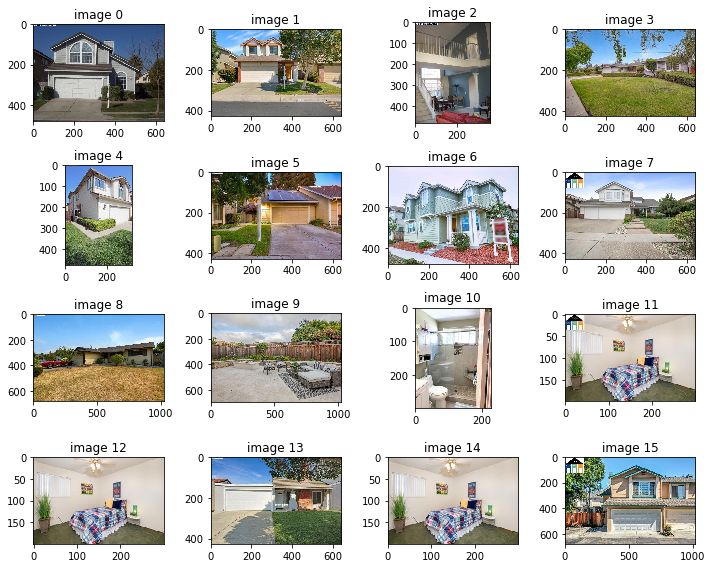

In [19]:
fig, ax = plt.subplots(4, 4, figsize=(10, 8))

row = 0
col = 0
for i in np.arange(16):
    ax[row, col].imshow(images.iloc[i]["pixels"], cmap="gray")
    ax[row, col].set_title('image {}'.format(i))
    col += 1
    if col >=4: 
        col = 0
        row += 1

plt.tight_layout()


# Products

In [20]:
# no address info for images...prob need to assocate with products for that info

products = df_filtered[df_filtered['type'] == 'product']
products.head()

,type,url,fromSeedUrl,gburl,offerPrice,title,pageUrl,text,primary,sentiment,siteName,html,priceRange.minPrice,venue,description,brand
1,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,$785.60,"34239 Maybird Cir, Fremont, CA 94555",https://www.realtor.com/realestateandhomes-det...,Property Overview - Corner Lot Across From Awa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,$532.80,"35317 Cabrillo Dr, Fremont, CA 94536",https://www.realtor.com/realestateandhomes-det...,Home Value for 35317 Cabrillo Dr\n35317 Cabril...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,"$1,048,000","34226 Petard Ter, Fremont, CA, 94555",https://www.realtor.com/realestateandhomes-det...,Learn more about 34226 Petard Ter\nAsk a quest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,"$1,450,000","5307 Cowboy Ct, Fremont, CA, 94555",https://www.realtor.com/realestateandhomes-det...,Learn more about 5307 Cowboy Ct\nAsk a questio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,"$1,589,000","3338 Sanderling Dr, Fremont, CA, 94555",https://www.realtor.com/realestateandhomes-det...,Learn more about 3338 Sanderling Dr\nAsk a que...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# original link: https://www.realtor.com/realestateandhomes-search/Fremont_CA/type-single-family-home
# has 234 images (according to site, as of 10/10)

len(images) #we might be missing some images

205

In [22]:
products.iloc[0]

type                                                             product
url                                                                  NaN
fromSeedUrl            https://www.realtor.com/realestateandhomes-sea...
gburl                  https://www.realtor.com/realestateandhomes-det...
offerPrice                                                       $785.60
title                               34239 Maybird Cir, Fremont, CA 94555
pageUrl                https://www.realtor.com/realestateandhomes-det...
text                   Property Overview - Corner Lot Across From Awa...
primary                                                              NaN
sentiment                                                            NaN
siteName                                                             NaN
html                                                                 NaN
priceRange.minPrice                                                  NaN
venue                                              

In [23]:
products['pageUrl'].iloc[0]

'https://www.realtor.com/realestateandhomes-detail/34239-Maybird-Cir_Fremont_CA_94555_M19530-21488'

In [24]:
images.iloc[0]['gburl'] #prob gotta filter the gburl links and match them...

'https://www.realtor.com/realestateandhomes-detail/34239-Maybird-Cir_Fremont_CA_94555_M19530-21488-diffbotxyz1814557087'

In [25]:
re.findall("^(.*?)-diffbot", images.iloc[0]['gburl'])[0]

'https://www.realtor.com/realestateandhomes-detail/34239-Maybird-Cir_Fremont_CA_94555_M19530-21488'

In [26]:
images['gburl'] = images['gburl'].apply(lambda x: re.findall("^(.*?)-diffbot", x)[0]) #clean gburl

In [27]:
images.iloc[0]['gburl']

'https://www.realtor.com/realestateandhomes-detail/34239-Maybird-Cir_Fremont_CA_94555_M19530-21488'

In [28]:
# match products and images by gburl
merged = products.merge(images, left_on='pageUrl', right_on='gburl', how='inner')

In [29]:
merged.head(2)

,type_x,url_x,fromSeedUrl_x,gburl_x,offerPrice_x,title_x,pageUrl_x,text_x,primary_x,sentiment_x,...,text_y,primary_y,sentiment_y,siteName_y,html_y,priceRange.minPrice_y,venue_y,description_y,brand_y,pixels
0,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,$785.60,"34239 Maybird Cir, Fremont, CA 94555",https://www.realtor.com/realestateandhomes-det...,Property Overview - Corner Lot Across From Awa...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[255, 254, 245], [253, 250, 241], [235, 235,..."
1,product,NaN,https://www.realtor.com/realestateandhomes-sea...,https://www.realtor.com/realestateandhomes-det...,$785.60,"34239 Maybird Cir, Fremont, CA 94555",https://www.realtor.com/realestateandhomes-det...,Property Overview - Corner Lot Across From Awa...,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[232, 255, 236], [229, 251, 239], [248, 255,..."


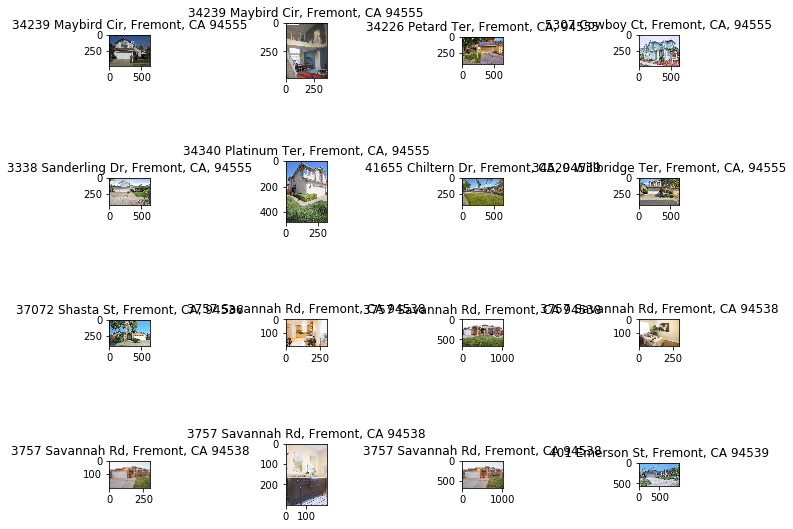

In [30]:
fig, ax = plt.subplots(4, 4, figsize=(10, 8))

row = 0
col = 0
for i in np.arange(16):
    ax[row, col].imshow(merged.iloc[i]["pixels"], cmap="gray")
    ax[row, col].set_title(merged.iloc[i]["title_x"])
    col += 1
    if col >=4: 
        col = 0
        row += 1

plt.tight_layout()

#...not pretty but eh 
# could prob group photos by addresses 

# Cleaning merged

In [118]:
"""
type_x: All 'product'
fromSeedUrl_x, fromSeedUrl_y: All https://www.realtor.com/realestateandhomes-search/Fremont_CA/type-single-family-home 
type_y: All 'image'
primary_y: All True
gburl_x, gburl_y: Same as pageUrl_x
'priceRange.minPrice_x': Same as offerPrice_x
url_x, primary_x, sentiment_x, siteName_x, html_x, venue_x, description_x, offerPrice_y, pageUrl_y, text_y, sentiment_y, 
    siteName_y, html_y, priceRange.minPrice_y, venue_y, description_y, brand_y: All NaN
"""
merged_cols_to_drop = ['type_x', 'url_x', 'fromSeedUrl_x', 'fromSeedUrl_y', 'type_y', 'primary_y', 'url_x', 'primary_x', 
                       'sentiment_x', 'siteName_x', 'html_x', 'venue_x', 'description_x', 'offerPrice_y', 'pageUrl_y', 
                       'text_y', 'sentiment_y', 'siteName_y', 'html_y', 'priceRange.minPrice_y', 'venue_y', 'description_y', 
                       'brand_y', 'gburl_x', 'gburl_y', 'priceRange.minPrice_x']
clean_merged = merged.drop(columns=merged_cols_to_drop)
clean_merged.columns = ['offerPrice', 'address', 'pageUrl', 'text', 'brand', 'imageUrl', 'features', 'pixels']
clean_merged

,offerPrice,address,pageUrl,text,brand,imageUrl,features,pixels
0,$785.60,"34239 Maybird Cir, Fremont, CA 94555",https://www.realtor.com/realestateandhomes-det...,Property Overview - Corner Lot Across From Awa...,NaN,https://p.rdcpix.com/v01/l74c6f341-m0xd-w1020_...,NaN,"[[[255, 254, 245], [253, 250, 241], [235, 235,..."
1,$785.60,"34239 Maybird Cir, Fremont, CA 94555",https://www.realtor.com/realestateandhomes-det...,Property Overview - Corner Lot Across From Awa...,NaN,https://p.rdcpix.com/v01/l74c6f341-m1xd-w1020_...,NaN,"[[[232, 255, 236], [229, 251, 239], [248, 255,..."
2,"$1,048,000","34226 Petard Ter, Fremont, CA, 94555",https://www.realtor.com/realestateandhomes-det...,Learn more about 34226 Petard Ter\nAsk a quest...,NaN,https://ap.rdcpix.com/f48ac00cc2a48854c4db90d3...,NaN,"[[[255, 255, 253], [244, 244, 242], [255, 255,..."
3,"$1,450,000","5307 Cowboy Ct, Fremont, CA, 94555",https://www.realtor.com/realestateandhomes-det...,Learn more about 5307 Cowboy Ct\nAsk a questio...,NaN,https://ap.rdcpix.com/5d95ac25e6f851d118484ad9...,NaN,"[[[255, 255, 253], [244, 244, 242], [255, 255,..."
4,"$1,589,000","3338 Sanderling Dr, Fremont, CA, 94555",https://www.realtor.com/realestateandhomes-det...,Learn more about 3338 Sanderling Dr\nAsk a que...,NaN,https://ap.rdcpix.com/172ca358d29d2ac52f4cf589...,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...
194,"$2,498,000","196 Fecundo Ter, Fremont, CA, 94539",https://www.realtor.com/realestateandhomes-det...,Learn more about 196 Fecundo Ter\nAsk a questi...,NaN,https://ap.rdcpix.com/998d68e4498d4a1391da4c9f...,NaN,"[[[254, 254, 254], [254, 254, 254], [255, 255,..."
195,"$2,199,000",Residence 5 Plan,https://www.realtor.com/realestateandhomes-det...,Learn more about Residence 5 plan\n(866) 984-9...,NaN,https://an.rdcpix.com/2241357854/7d4e3e654447d...,NaN,"[[[52, 90, 153], [52, 90, 153], [52, 90, 153],..."
196,"$1,325,000","36408 Calabria Cmn, Fremont, CA, 94536",https://www.realtor.com/realestateandhomes-det...,Learn more about 36408 Calabria Cmn\nAsk a que...,NaN,https://ap.rdcpix.com/9e75dcbd7a81adc32ab64741...,NaN,"[[[252, 255, 251], [242, 247, 241], [252, 255,..."
197,"$1,299,999","34341 Maybird Cir, Fremont, CA, 94555",https://www.realtor.com/realestateandhomes-det...,Learn more about 34341 Maybird Cir\nAsk a ques...,NaN,https://ap.rdcpix.com/76613e2000cb4c932f216250...,NaN,"[[[255, 255, 255], [246, 246, 246], [255, 255,..."


In [119]:
clean_merged[clean_merged['features'].notnull()]['features']  # Could rename column if another name is more fitting

12     Yard: Back Yard, Fenced, Patio, Side Yard, Spr...
15                                           Off Market 
40                                Total Bathrooms: 2 / 1
44                                Total Bathrooms: 5 / 1
52     Master Bathroom Features: Shower Stall(s), Til...
70     Bedroom 1 Description: Ground Floor Bedroom, M...
84     Yard: Tool Shed, Landscape Back, Landscape Fro...
93     Bedroom 1 Description: Master Bedroom on Groun...
94                                Total Bathrooms: 2 / 0
160                               Total Bathrooms: 2 / 1
Name: features, dtype: object

In [120]:
# 199 rows but there seem to be quite a few repeats
for col in clean_merged:
    if col != 'pixels':  # Can't get nunique of series of Arrays (unhashable)
        print(f'{col}: Unique values: {clean_merged[col].nunique()}, Nulls: {sum(clean_merged[col].isna())}')

offerPrice: Unique values: 93, Nulls: 0
address: Unique values: 108, Nulls: 0
pageUrl: Unique values: 119, Nulls: 0
text: Unique values: 116, Nulls: 1
brand: Unique values: 1, Nulls: 194
imageUrl: Unique values: 199, Nulls: 0
features: Unique values: 9, Nulls: 189


In [121]:
# Around a quarter of the 'text' values are a generic "Click here to learn more and talk to a rep" and don't have any info on the house
generic_str = "^Learn more about .*\\nAsk a question\\nI am interested in .*\.\nGet pre-approved by a lender\.\\nBy proceeding, you consent to receive calls and texts at the number you provided, including marketing by autodialer and prerecorded and artificial voice, and email, from realtor\.com and others about your inquiry and other home-related matters, but not as a condition of any purchase; this applies regardless of whether you check, or leave un-checked, any box above\.$"
generics = clean_merged['text'].apply(lambda x : re.search(generic_str, str(x)))
generics.count()

55

### Soup Stuff

In [33]:
# URL = "https://www.realtor.com/realestateandhomes-search/Fremont_CA"
# # URL = 'https://www.realtor.com/realestateandhomes-detail/38009-Dover-Cmn_Fremont_CA_94536_M22282-15953'
# # URL = 'https://www.realtor.com/realestateandhomes-detail/38009-Dover-Cmn_Fremont_CA_94536_M22282-15953'

# headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) \
#            AppleWebKit/601.3.11 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9','Accept-Encoding': 'identity'}

# page = requests.get(URL, headers=headers)#requests.get(url).text, 'html5lib'

In [34]:
# soup = BeautifulSoup(page.content, 'html5lib')
# soup#.prettify()

In [35]:
# test_image_link = soup.find_all('img')[0]['src']
# test_image_link

In [36]:
# for img in soup.find_all('img'):
#     print(img.get('src'))

In [37]:
# soup.find_all('div', attrs={'data-testid': 'gallery-item'})

In [38]:
# pixels = io.imread(test_image_link)
# pixels

In [39]:
# io.imshow(pixels);